In [381]:
!pip3 install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [382]:
!pip3 install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [383]:
# Inicializção das bibliotecas
%matplotlib inline

# importando o numpy, pandas, matplotlib e seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importando os principais usos do scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

In [384]:
# Sua resposta aqui
# Caminho do arquivo
url = "/content/carros.csv"

# Lê e carrega o arquivo para a memória
car_data = pd.read_csv(url)

# Retorna um trecho com as 15 primeiras linhas do dataframe
print(car_data.head(15))

            Brand     Price       Body  Mileage/1000  EngineV Engine Type  \
0             BMW   4200.00      sedan           277     2.00      Petrol   
1   Mercedes-Benz   7900.00        van           427     2.90      Diesel   
2   Mercedes-Benz  13300.00      sedan           358     5.00         Gas   
3            Audi  23000.00  crossover           240     4.20      Petrol   
4          Toyota  18300.00  crossover           120     2.00      Petrol   
5   Mercedes-Benz 199999.00  crossover             0     5.50      Petrol   
6             BMW   6100.00      sedan           438     2.00         Gas   
7            Audi  14200.00      vagon           200     2.70      Diesel   
8         Renault  10799.00      vagon           193     1.50      Diesel   
9      Volkswagen   1400.00      other           212     1.80         Gas   
10        Renault  11950.00      vagon           177     1.50      Diesel   
11        Renault   2500.00      sedan           260     1.79      Petrol   

In [385]:
#Verificando as informaçoes do dataset
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage/1000  4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB
None


In [386]:
car_data.isna().sum()

Brand             0
Price           172
Body              0
Mileage/1000      0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

Quantos dados existem nesse dataset = 4345 * 9 

quantidade de atributos = 9

Existem valores faltantes = Sim, 172 + 150

De que tipo são os dados = float64, int64 e object

2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

In [387]:
# Vamos dropar de cara o Model, pois é muito especifico e não nos interessa
car_data = car_data.dropna()
df = car_data.drop(labels='Model', axis=1)
df.head()

,Brand,Price,Body,Mileage/1000,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011


In [388]:
#Criando o dicionario para tradução
traducao = { 
    'Brand' : 'marca',
    'Price' : 'preco',
    'Body' : 'tipo',
    'Mileage/1000' :'milhas',
    'EngineV': 'motor',
    'Engine Type': 'combustivel',
    'Registration':'registro',
    'Year':'ano'
}

# Fazendo o rename das colunas com o dicionario
df = df.rename(columns=traducao)

In [389]:
# Fazendo a conversão das milhas para Km, lembrando de multiplicar por 1000 devido a caracteristica do dataset
df ['km'] = df.milhas * 1.60934 *1000
df.head()

,marca,preco,tipo,milhas,motor,combustivel,registro,ano,km
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,445787.18
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,687188.18
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,576143.72
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,386241.60
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,193120.80


In [390]:
# Removendo as colunas que nao queremos
df = df.drop(columns = ["milhas"])
df.head()

,marca,preco,tipo,motor,combustivel,registro,ano,km
0,BMW,4200.00,sedan,2.00,Petrol,yes,1991,445787.18
1,Mercedes-Benz,7900.00,van,2.90,Diesel,yes,1999,687188.18
2,Mercedes-Benz,13300.00,sedan,5.00,Gas,yes,2003,576143.72
3,Audi,23000.00,crossover,4.20,Petrol,yes,2007,386241.60
4,Toyota,18300.00,crossover,2.00,Petrol,yes,2011,193120.80


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   marca        4025 non-null   object 
 1   preco        4025 non-null   float64
 2   tipo         4025 non-null   object 
 3   motor        4025 non-null   float64
 4   combustivel  4025 non-null   object 
 5   registro     4025 non-null   object 
 6   ano          4025 non-null   int64  
 7   km           4025 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 283.0+ KB


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

Text(0.5, 1.0, 'preco e motor')

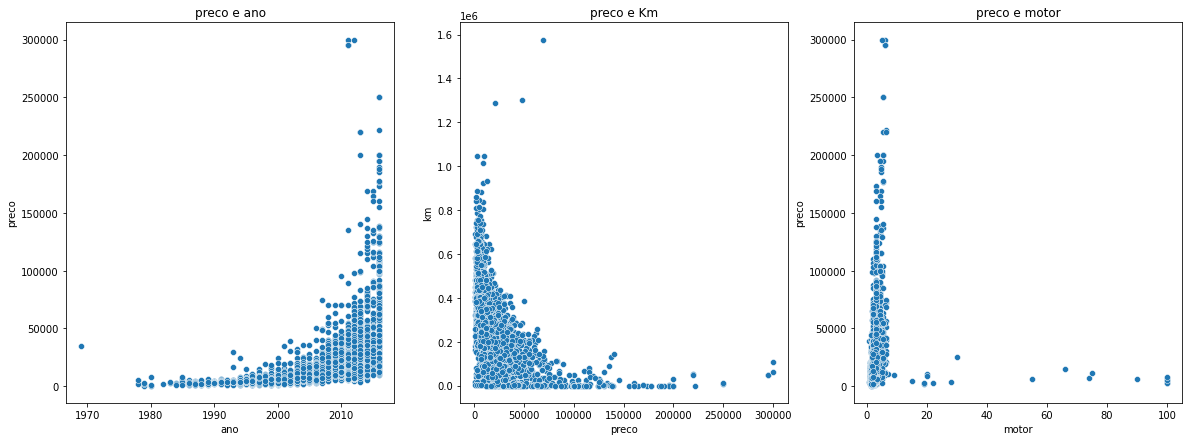

In [392]:
#Sua resposta aqui

plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("preco e ano")
sns.scatterplot(x='ano',y='preco',data=df)

plt.subplot(1,3,2)
plt.title("preco e Km")
sns.scatterplot(x='preco',y='km',data=df)

plt.subplot(1,3,3)
sns.scatterplot(y='preco',x='motor',data=df)
plt.title("preco e motor")

Pelo Gráficos, temos muitos outliers, que vão impactar no nosso modelo, mas podemos conviver com isso.

In [393]:
# O preço tem uma caracteristica logaritmica, vamos trabalhar com log para lineariza-la
log_price = np.log(df['preco'])
df['log_preco'] = log_price
df = df.drop(columns = ["preco"])
df.head()

,marca,tipo,motor,combustivel,registro,ano,km,log_preco
0,BMW,sedan,2.00,Petrol,yes,1991,445787.18,8.34
1,Mercedes-Benz,van,2.90,Diesel,yes,1999,687188.18,8.97
2,Mercedes-Benz,sedan,5.00,Gas,yes,2003,576143.72,9.50
3,Audi,crossover,4.20,Petrol,yes,2007,386241.60,10.04
4,Toyota,crossover,2.00,Petrol,yes,2011,193120.80,9.81


Text(0.5, 1.0, 'Log preco and tipo motor')

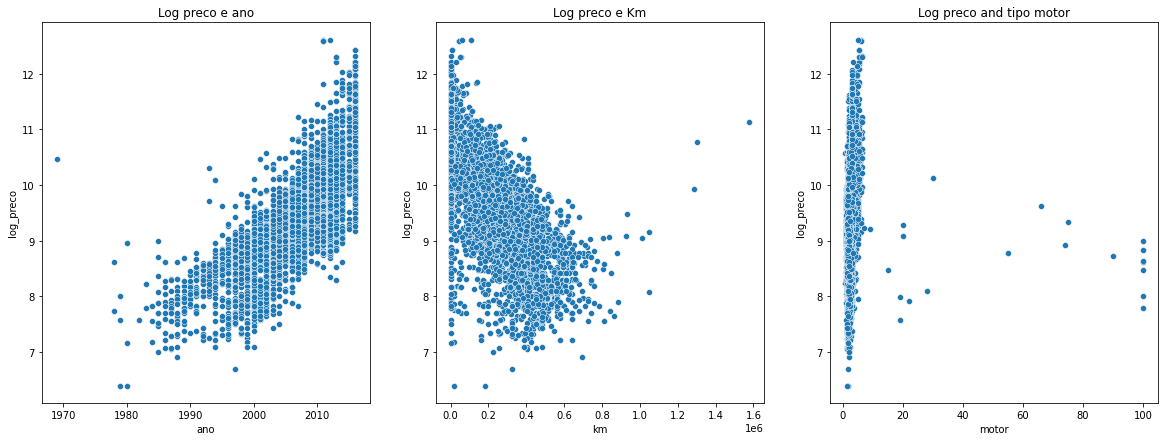

In [394]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Log preco e ano")
sns.scatterplot(x='ano',y='log_preco',data=df)

plt.subplot(1,3,2)
plt.title("Log preco e Km")
sns.scatterplot(y='log_preco',x='km',data=df)

plt.subplot(1,3,3)
sns.scatterplot(y='log_preco',x='motor',data=df)
plt.title("Log preco and tipo motor")

# The relationships show a clear linear relationship
# This is some good linear regression material

<AxesSubplot:>

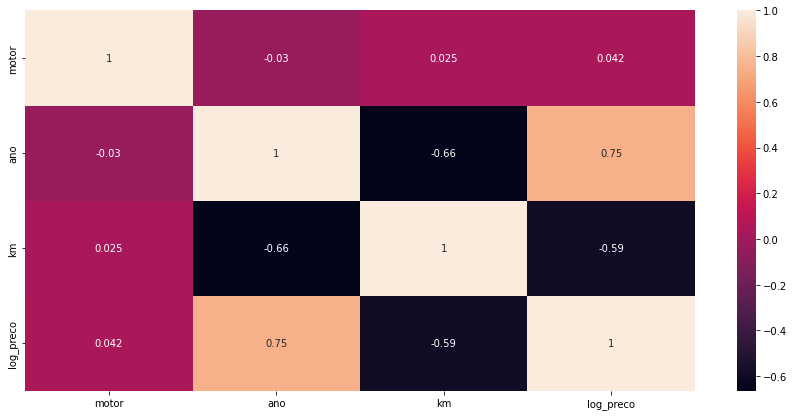

In [395]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(df.corr(), annot=True)

In [396]:
#Creating Dummie Variables
data_with_dummies = pd.get_dummies(df,drop_first=True)
data_with_dummies.head()

,motor,ano,km,log_preco,marca_BMW,marca_Mercedes-Benz,marca_Mitsubishi,marca_Renault,marca_Toyota,marca_Volkswagen,tipo_hatch,tipo_other,tipo_sedan,tipo_vagon,tipo_van,combustivel_Gas,combustivel_Other,combustivel_Petrol,registro_yes
0,2.00,1991,445787.18,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,2.90,1999,687188.18,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,5.00,2003,576143.72,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,4.20,2007,386241.60,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,2.00,2011,193120.80,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [397]:
data_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   motor                4025 non-null   float64
 1   ano                  4025 non-null   int64  
 2   km                   4025 non-null   float64
 3   log_preco            4025 non-null   float64
 4   marca_BMW            4025 non-null   uint8  
 5   marca_Mercedes-Benz  4025 non-null   uint8  
 6   marca_Mitsubishi     4025 non-null   uint8  
 7   marca_Renault        4025 non-null   uint8  
 8   marca_Toyota         4025 non-null   uint8  
 9   marca_Volkswagen     4025 non-null   uint8  
 10  tipo_hatch           4025 non-null   uint8  
 11  tipo_other           4025 non-null   uint8  
 12  tipo_sedan           4025 non-null   uint8  
 13  tipo_vagon           4025 non-null   uint8  
 14  tipo_van             4025 non-null   uint8  
 15  combustivel_Gas      4025 non-null   u

## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

Resposta:

5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

Resposta:

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

Resposta:

Algoritmo 1: 

Algoritmo 2: 

## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [398]:
x = data_with_dummies.drop('log_preco',axis=1)
y = data_with_dummies['log_preco']

In [399]:

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=365)

7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)


In [400]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.8184261904944484
RMSE : 0.38536571835659506


7.2 - Algoritmo 2:  (0,5)

7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

Resposta:

## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

In [401]:
carro = [{'motor':2, 'ano':2005, 'km': 172095, 'ano':2005,'marca_BMW':0,'marca_Mercedes-Benz': 0,'marca_Mitsubishi':0,'marca_Renault':0,'marca_Toyota':0,'marca_Volkswagen':1,'tipo_hatch':0,'tipo_other':0,'tipo_sedan':1,'tipo_vagon':0,'tipo_van':0,'combustivel_Gas':1,'combustivel_Other':0,'combustivel_Petrol':0,'registro_yes':1}]

In [402]:
#Sua resposta aqui
X_test = pd.DataFrame(carro)
preco = lr.predict(X_test)
preco = np.e**preco
print(f'O preço previsto para um veículo ano 2005 com 172095.3 km rodados é R${preco[0]:.2f}.')

O preço previsto para um veículo ano 2005 com 172095.3 km rodados é R$9532.35.
